### Contents
#### Importing libraries
#### Importing data sets
#### Changing column from string to integer
#### Creating subset of df
#### Creating new function
#### Loc( ) function
#### If-statements with for-loops
#### Creating new column for busiest day
#### Creating new column for busiest and least busy period of day
#### Dropping unneeded columns

## Importing Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np
import os

## Importing df

In [3]:
#defining path
path = r'/Users/davidmsimpson/20230907 Instacart Basket Analysis'

In [4]:
# Import df_ords_prods_merged
df_ords_prods_merged = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged.csv'), index_col = 0)

In [5]:
df_ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day
0,2539329,1,1,2,8,NaN,1,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders
1,2398795,1,2,3,7,15.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders
2,473747,1,3,3,12,21.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders
3,2254736,1,4,4,7,29.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders
4,431534,1,5,4,15,28.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders


In [6]:
# Changing new_customer column to integer
df_ords_prods_merged['new_customer'] = df_ords_prods_merged ['new_customer'].apply(int)

In [7]:
df_ords_prods_merged.shape

(23050000, 20)

## Creating subset of df

In [8]:
# Creating subset of df
df = df_ords_prods_merged[:1000000]

In [9]:
df.tail()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day
999995,2836489,164627,14,0,15,6.0,0,30489,2,0,both,30491,Original Hummus,67,20,7.5,Mid-range product,Busiest days,Busiest period,Most orders
999996,1843600,164632,5,1,19,9.0,0,30489,2,0,both,30491,Original Hummus,67,20,7.5,Mid-range product,Busiest days,Regularly busy period,Average orders
999997,733106,164632,9,2,22,10.0,0,30489,3,1,both,30491,Original Hummus,67,20,7.5,Mid-range product,Regularly busy,Regularly busy period,Average orders
999998,1650124,164632,17,6,17,13.0,0,30489,1,1,both,30491,Original Hummus,67,20,7.5,Mid-range product,Regularly busy,Regularly busy period,Average orders
999999,3378258,164632,22,6,10,15.0,0,30489,3,1,both,30491,Original Hummus,67,20,7.5,Mid-range product,Regularly busy,Busiest period,Most orders


In [10]:
df.shape

(1000000, 20)

## Creating new function

In [11]:
# Creating conditions for function price_label
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [12]:
# Apply the function

df['price_range'] = df.apply(price_label, axis=1)

/var/folders/v0/xrbnqqfs3715z2hj7f5pvkf80000gn/T/ipykernel_2052/93659844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [13]:
df.head(10)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,price_range
0,2539329,1,1,2,8,NaN,1,196,1,0,...,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,Mid-range product
1,2398795,1,2,3,7,15.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,Mid-range product
2,473747,1,3,3,12,21.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,Mid-range product
3,2254736,1,4,4,7,29.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,Mid-range product
4,431534,1,5,4,15,28.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,Mid-range product
5,3367565,1,6,2,7,19.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy period,Fewest orders,Mid-range product
6,550135,1,7,1,9,20.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Busiest days,Busiest period,Most orders,Mid-range product
7,3108588,1,8,1,14,14.0,0,196,2,1,...,195,Soda,77,7,9.0,Mid-range product,Busiest days,Busiest period,Most orders,Mid-range product
8,2295261,1,9,1,16,0.0,0,196,4,1,...,195,Soda,77,7,9.0,Mid-range product,Busiest days,Regularly busy period,Average orders,Mid-range product
9,2550362,1,10,4,8,30.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,Mid-range product


In [14]:
# Value counts for new price_range column
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    756450
Low-range product    243550
Name: count, dtype: int64

In [15]:
# Maximum price in subset
df['prices'].max()

14.8

## loc() function

In [16]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [17]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [18]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [19]:
# Value counts for new price_range column
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    756450
Low-range product    243550
Name: count, dtype: int64

In [20]:
# Creating new function price_label for entire df
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [21]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [22]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [23]:
df_ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day
0,2539329,1,1,2,8,NaN,1,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders
1,2398795,1,2,3,7,15.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders
2,473747,1,3,3,12,21.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders
3,2254736,1,4,4,7,29.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders
4,431534,1,5,4,15,28.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders


In [24]:
df_ords_prods_merged.shape

(23050000, 20)

In [25]:
# Maximum price in df
df_ords_prods_merged['prices'].max()

14900.0

In [26]:
# Value counts for new price_range column
df_ords_prods_merged['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     15778900
Low-range product      6969483
High-range product      301617
Name: count, dtype: int64

#### Calculating price range percentages for final report

In [27]:
# Calculate the value counts for "price_range_loc"
pricerange_counts = df_ords_prods_merged['price_range_loc'].value_counts(dropna=False)

In [28]:
pricerange_counts

price_range_loc
Mid-range product     15778900
Low-range product      6969483
High-range product      301617
Name: count, dtype: int64

In [29]:
# Calculate the total count of occurrences
total_count = pricerange_counts.sum()

In [30]:
# Calculate the percentage of total occurrences for each range
pricerange_percentages = (pricerange_counts / total_count) * 100

In [31]:
# Create a DataFrame with numerical indices and percentages
pricerange_df = pd.DataFrame({'price_range_loc': pricerange_percentages.index, 'Percentage of Total': pricerange_percentages.values})

In [32]:
# Sort the DataFrame by the pricerange
pricerange_df = pricerange_df.sort_values(by='price_range_loc')

In [33]:
# Reset the index to create index order
pricerange_df = pricerange_df.reset_index(drop=True)

In [34]:
# Display the resulting DataFrame
print(pricerange_df)

      price_range_loc  Percentage of Total
0  High-range product             1.308534
1   Low-range product            30.236369
2   Mid-range product            68.455098


## If-statements with for-loops

In [35]:
# Sample of a for-loop
for x in range(30, 45): 
    print("My age is %d" % (x))

My age is 30
My age is 31
My age is 32
My age is 33
My age is 34
My age is 35
My age is 36
My age is 37
My age is 38
My age is 39
My age is 40
My age is 41
My age is 42
My age is 43
My age is 44


In [36]:
# Finding values for order_day_of_week
df_ords_prods_merged['order_day_of_week'].value_counts(dropna = False)

order_day_of_week
0    4518480
1    4070890
6    3195608
2    2975836
5    2952409
3    2689010
4    2647767
Name: count, dtype: int64

In [37]:
# Find percentage of dow. Calculate the value counts for order_day_of_week
dow_counts = df_ords_prods_merged['order_day_of_week'].value_counts(dropna=False)

In [38]:
# Calculate the total count of occurrences
total_count = dow_counts.sum()

In [39]:
# Calculate the percentage of total occurrences for each day
dow_percentages = (dow_counts / total_count) * 100

In [40]:
# Create a DataFrame with numerical indices and percentages
dow_df = pd.DataFrame({'Day of Week': dow_percentages.index, 'Percentage of Total': dow_percentages.values})

In [41]:
# Sort the DataFrame by the day of week
dowr_df = dow_df.sort_values(by='Day of Week')

In [42]:
# Reset the index to create a numerical index order
dow_df = dow_df.reset_index(drop=True)

In [43]:
# Display the resulting DataFrame
print(dow_df)

   Day of Week  Percentage of Total
0            0            19.602950
1            1            17.661128
2            6            13.863809
3            2            12.910351
4            5            12.808716
5            3            11.665987
6            4            11.487059


In [44]:
# Creating for-loop for busiest, least busy, regular days
result = []

for value in df_ords_prods_merged["order_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [45]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [46]:
# Creating new column for busiest day
df_ords_prods_merged['busiest day'] = result

In [47]:
# Finding values for busiest day
df_ords_prods_merged['busiest day'].value_counts(dropna = False)

busiest day
Regularly busy    15883753
Busiest day        4518480
Least busy         2647767
Name: count, dtype: int64

In [48]:
# Checking new column
df_ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,busiest day
0,2539329,1,1,2,8,NaN,1,196,1,0,...,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,Regularly busy
1,2398795,1,2,3,7,15.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,Regularly busy
2,473747,1,3,3,12,21.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,Regularly busy
3,2254736,1,4,4,7,29.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,Least busy
4,431534,1,5,4,15,28.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,Least busy


## Task 4.7 

In [49]:
# Change busiest day to busiest days; creating for-loop for busiest, least busy, regular days
result = []

for value in df_ords_prods_merged["order_day_of_week"]:
  if value == 0 or value == 1:
    result.append("Busiest days")
  elif value == 3 or value ==4:
    result.append("Least busy days")
  else:
    result.append("Regularly busy")

In [50]:
# Creating new column for busiest days
df_ords_prods_merged['busiest days'] = result

In [51]:
# Finding values for busiest days
df_ords_prods_merged['busiest days'].value_counts(dropna = False)

busiest days
Regularly busy     9123853
Busiest days       8589370
Least busy days    5336777
Name: count, dtype: int64

In [52]:
# Checking new column
df_ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day,busiest day
0,2539329,1,1,2,8,NaN,1,196,1,0,...,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders,Regularly busy
1,2398795,1,2,3,7,15.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,Regularly busy
2,473747,1,3,3,12,21.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,Regularly busy
3,2254736,1,4,4,7,29.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders,Least busy
4,431534,1,5,4,15,28.0,0,196,1,1,...,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders,Least busy


In [53]:
df_ords_prods_merged.shape

(23050000, 21)

In [54]:
df_ords_prods_merged = df_ords_prods_merged.drop(columns=['busiest day'])

In [55]:
df_ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest days,busiest period,busiest_period_of_day
0,2539329,1,1,2,8,NaN,1,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest period,Most orders
1,2398795,1,2,3,7,15.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders
2,473747,1,3,3,12,21.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders
3,2254736,1,4,4,7,29.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Least busy period,Fewest orders
4,431534,1,5,4,15,28.0,0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy days,Busiest period,Most orders


### Create new column for busiest and least busy period of the day

In [56]:
# Finding values for order_hour_of_day
df_ords_prods_merged['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    1971462
11    1946234
14    1914850
15    1894454
13    1892598
12    1858233
16    1797661
9     1764301
17    1465117
8     1244627
18    1142480
19     877180
20     691817
7      647556
21     573645
22     459322
23     287949
6      208572
0      153904
1       79460
5       61623
2       46675
4       36013
3       34267
Name: count, dtype: int64

In [93]:
# Value counts for order_hour_of_day and sort them in numerical order
order_hour_counts = df_ords_prods_merged['order_hour_of_day'].value_counts(dropna=False).sort_index()

In [94]:
order_hour_counts

order_hour_of_day
0      153879
1       79443
2       46663
3       34255
4       36004
5       61608
6      208535
7      647449
8     1244422
9     1763992
10    1971095
11    1945851
12    1857858
13    1892262
14    1914495
15    1894090
16    1797264
17    1464792
18    1142233
19     876981
20     691679
21     573549
22     459261
23     287911
Name: count, dtype: int64

#### Creating line graph for total orders by hour of day

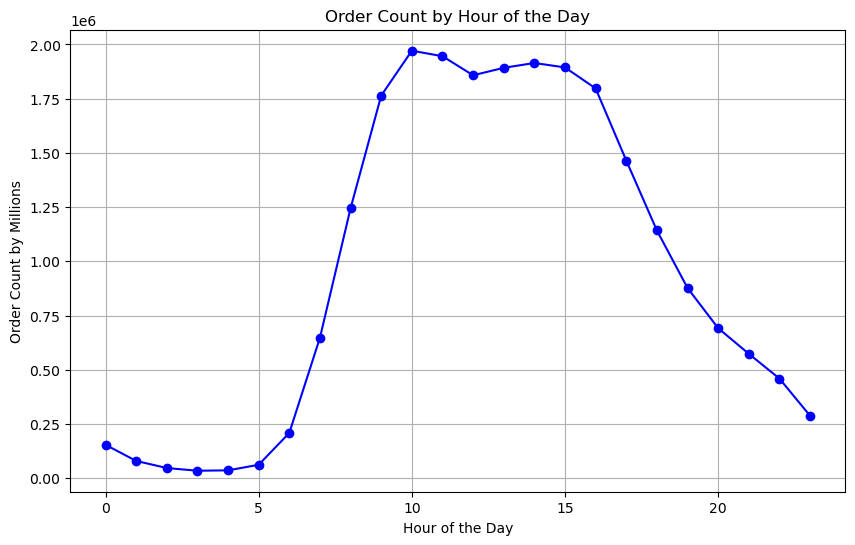

In [97]:
# Value counts for order_hour_of_day and sort them in numerical order
order_hour_counts = df_ords_prods_merged['order_hour_of_day'].value_counts(dropna=False).sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(order_hour_counts.index, order_hour_counts, marker='o', linestyle='-', color='b')
plt.title('Order Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count by Millions')
plt.grid(True)

# Define the file path where you want to save the chart
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_count_by_hour.png')

# Verify that the path exists
if os.path.exists(os.path.dirname(save_path)):
    # Save the chart to the specified path
    plt.savefig(save_path)
    
# Display the line graph
plt.show()

In [57]:
# Creating new column for period_of_day
df_ords_prods_merged['period_of_day'] = result

In [58]:
# Creating for-loop for period_of_day
result = []

for value in df_ords_prods_merged["order_hour_of_day"]:
  if value >= 0 and value <= 7:
    result.append("Fewest orders")
  elif value >= 8 and value <= 15:
    result.append("Most orders")
  elif value >= 16 and value <= 23:
    result.append("Average orders")
  else:
    result.append("Unknown_time")

In [59]:
result

['Most orders',
 'Fewest orders',
 'Most orders',
 'Fewest orders',
 'Most orders',
 'Fewest orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Fewest orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orde

In [60]:
# Creating new column for busiest period of day
df_ords_prods_merged['busiest_period_of_day'] = result

In [61]:
# Finding values for busiest period of day
df_ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most orders       14486759
Average orders     7295171
Fewest orders      1268070
Name: count, dtype: int64

In [84]:
# Find percentage of busiest period. Calculate the value counts for busiest_period_of_day
bpod_counts = df_ords_prods_merged['busiest_period_of_day'].value_counts(dropna=False)

In [85]:
# Calculate the total count of occurrences
total_count = bpod_counts.sum()

In [86]:
# Calculate the percentage of total occurrences for each day
bpod_percentages = (bpod_counts / total_count) * 100

In [88]:
# Create a DataFrame with numerical indices and percentages
bpod_df = pd.DataFrame({'busiest_period_of_day': bpod_percentages.index, 'Percentage of Total': bpod_percentages.values})

In [89]:
# Sort the DataFrame by the day of week
bpod_df = bpod_df.sort_values(by='Percentage of Total')

In [90]:
# Display the resulting DataFrame
print(bpod_df)

  busiest_period_of_day  Percentage of Total
2         Fewest orders             5.501430
1        Average orders            31.648901
0           Most orders            62.849669


In [63]:
# Dropping extra index columns
df_ords_prods_merged = df_ords_prods_merged.drop(columns=['period_of_day'])

In [64]:
# Export data to csv

df_ords_prods_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merged.csv'))